In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

In [6]:
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [3]:
img=cv2.imread("lenna.bmp", 0)
print(img.shape) #영상크기
print(img.dtype) #데이터 타입

(512, 512)


In [4]:
dst= img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        dst[r,c] +=30 

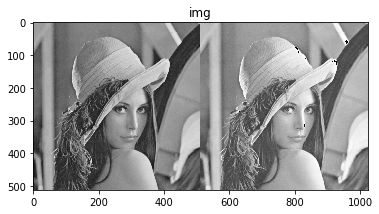

In [8]:
# imshow("img", img)
# imshow("dst", dst)
imshow("img", np.hstack((img,dst)))
#큰값 더할수록 255넘어간 overflow 많이 일어남


- 250+10 모든연산 비트단위로 하는 컴퓨터, 250을 비트로 바꾸면 
- 1111 1111=255
- 10001001=10
-> if >=255 식으로 하면 이미 오버플로우 넘어간거라 안됨

In [11]:
dst= img.copy()
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        col= img[r,c]+30
        if col>255: col= 255
        dst[r,c] = col
#속도 느려서

In [9]:
#        if (img[r,c]+30 >255)       라고 하면 안되는 이유
    # print(img[0,0]+100) 
# img[0,0](unsigned) + 100(int) 바꿔서 계산- 가능
#dest[0,0]=img[0,0]+100) 은 안됨
a=img[0,0]+100
print(a)

262


In [ ]:
# dst= dst+20 연산 빠름 넘파이가 편리한 이유
a= np.array([1,2,3,4,5])
print(a+4)

In [12]:
dst=dst+20
dst +=20
dst = img+30
imshow("dst", dst)
# 오버플로우 나올수밖에없음

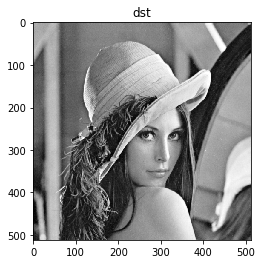

In [13]:
dst= cv2.add(img,30)
imshow("dst",dst)

In [14]:
A=np.array([[1,5],[10,20]])
print(A)
print(A.dtype)

B=cv2.add(A,240)
print(B)
#260 넘어간거

[[ 1  5]
 [10 20]]
int32
[[241 245]
 [250 260]]


In [16]:
A=np.array([[1,5],[10,20]]).astype('uint8')
print(A)
print(A.dtype)

B=cv2.add(A,240)
print(B)

[[ 1  5]
 [10 20]]
uint8
[[241 245]
 [250 255]]


In [18]:
print(A[1,1]+250) #단일연산
b=A+250  #이거자체는 int확장연산되나
print(b) #b도 A형태로 바꿔버린다,,
print(A.dtype)

print(b.dtype)
# 싱글타입에서 연산할때:정수와 실수라면 실수 변환하여 연산
# A행렬 타입이 바뀌지않는다는 

270
[[251 255]
 [  4  14]]


In [ ]:
print(A[1,1]+250) #단일연산
b=A+250  #int 일때는 A와같은 형태로 따라감
c=A+250.0 #연산하면서 정수를 실수로 바꿔야 하는데 c를 float으로 확장해버림
print(b) #일반적으로는 형변환 큰쪽으로 되는데, 실수타입일때는 float타입으로 나옴
print(A.dtype)
print(b.dtype)
print(c.dtype)



In [19]:
print(A[1,1]+250) #자동 형변환 uint8->int32
b=A+250  #자동형변환 되지만 b가 unit8타입
c=A+250.0 #자동형변환 되고 c가 float타입
d=A+300 #자동형변환 되고 d가 uint16타입   - 256 이상이라 8비트로 커버안되니까 16비트로감
print(b) 
print(A.dtype)
print(b.dtype)
print(c.dtype)
print(d.dtype)

270
[[251 255]
 [  4  14]]
uint8
uint8
float64
uint16


In [23]:
# 0보다 작은함수는 0으로, 255보다 큰건 255로 clipping  -> add함수보다 보편적으로 쓰임/곱하기 나누기도 다 가능
dd= np.clip(A+240.0, 0, 255)
print(dd)
print(dd.dtype)

[[241. 245.]
 [250. 255.]]
float64


In [22]:
dd= np.clip(A+240, 0, 255) #항상 더해지는 수의 형태 확인잘하기,,,, 오류 줄이려면 실수쓰기-> 타입 바꾸고싶을떄 astype('uint8')
# dd=(np.clip(A+240, 0, 255)).astype('uint8')
print(dd)
print(dd.dtype)

[[241 245]
 [250   4]]
uint8


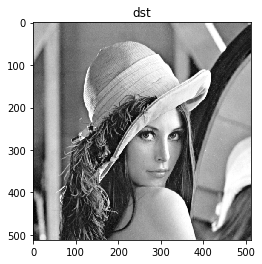

In [24]:
alpha=1.1
beta=20
dst=(np.clip(alpha*img+beta,0,255)).astype('uint8')
imshow("dst",dst)
# a 조절하는건 기울기만큼의 변화량이 생기는거(기존값에서 10%더 밝게: *1.1 작은건 작게/큰건 더크게), 
# b는 전체적으로 들고놓고: 동일하게': x절y절 생각

In [28]:
img=cv2.imread("gamma2.jpg")
alpha= 1.1
beta= 20
dst= (np.clip(alpha*img+beta, 0, 255)).astype('uint8')
imshow("dst", np.hstack((img,dst)))

## point 연산
- y= alpha*img+beta
- clipping
## LUT 
- 비선형변환
- 고속 변환
cf. https://blog.frame.io/2017/09/20/beginners-guide-to-curves/

In [29]:
table= np.array([255-i for i in range(256)])
print(table)

[255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238
 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220
 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202
 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184
 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166
 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148
 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130
 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112
 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96  95  94
  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78  77  76
  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60  59  58
  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42  41  40
  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22
  21  20  19  18  17  16  15  14  13  12  11  10   

In [30]:
img1 = cv2.imread('lenna.bmp',0)
out= cv2.LUT(img1,table)
imshow("",out)

In [31]:
dst= img1.copy()
for r in range(img1.shape[0]):
    for c in range(img1.shape[1]):
        dst[r,c] = table[img1[r,c]]      #0->255
        #오버플로우 신경안씀, 어차피 테이블안에서만

In [33]:
#threshold LUT
table= np.array([i>127 for i in range(256)])
print(table)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [34]:
table= np.array([i>127 for i in range(256)])*255
print(table)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [37]:
table= np.array([255 if i>127 else 0 for i in range(256)])
print(table)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [38]:
#감마보정: lut보다 파라미터 적고, 비선형이기 떄문에 대비효과 뛰어남
p=100 /255.0  #1보다 무조건 작게 만들기 위해서 255로 나눔
gamma= 1
print(p ** gamma)  # 0.5->0.5


0.39215686274509803


In [42]:
p=0.7
gamma= 0.5            ## 0.7을 루트한거 sqt(_) 
print(p, p ** gamma)  #gamm<1: 밝아짐 

gamma= 1
print(p, p ** gamma) #gamm=1일때 그대로 출력

gamma= 2.0
print(p, p ** gamma) # gamma>1일때 어두워짐 거의 모든값이 0에 수렴

0.7 0.8366600265340756
0.7 0.7
0.7 0.48999999999999994


[  0   9  13  17  21  24  26  29  31  34  36  38  40  42  44  46  48  50
  51  53  55  57  58  60  61  63  64  66  67  69  70  72  73  74  76  77
  78  80  81  82  83  85  86  87  88  90  91  92  93  94  95  97  98  99
 100 101 102 103 104 105 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 130 131 132 133 134 135
 136 137 138 139 140 141 141 142 143 144 145 146 147 148 148 149 150 151
 152 153 153 154 155 156 157 158 158 159 160 161 162 163 163 164 165 166
 167 167 168 169 170 170 171 172 173 174 174 175 176 177 177 178 179 180
 180 181 182 183 183 184 185 186 186 187 188 189 189 190 191 192 192 193
 194 194 195 196 197 197 198 199 199 200 201 202 202 203 204 204 205 206
 206 207 208 208 209 210 211 211 212 213 213 214 215 215 216 217 217 218
 219 219 220 221 221 222 223 223 224 225 225 226 226 227 228 228 229 230
 230 231 232 232 233 234 234 235 235 236 237 237 238 239 239 240 240 241
 242 242 243 244 244 245 245 246 247 247 248 248 24

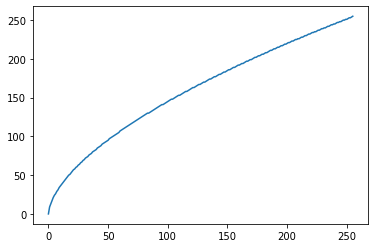

In [44]:
gamma= 0.6
table= np.array([((i /255.0)**gamma)*255 for i in np.arange(0, 256)]).astype("uint8")
                 #255.0으로 나누는거 중요
print(table)
plt.plot(table)

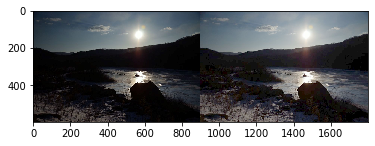

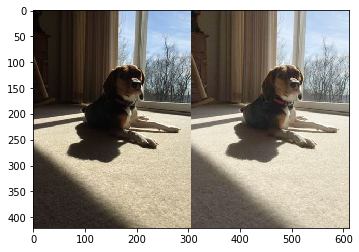

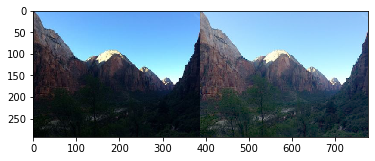

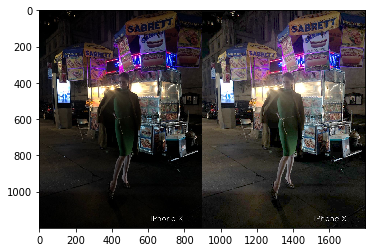

In [46]:
files= ["gamma1.jpg", "gamma2.jpg", "gamma3.jpg", "g.jpg"]
for f in files:
    img1= cv2.imread(f)
    out=cv2.LUT(img1, table)
    imshow("", np.hstack((img1,out)))

## 영상 합성

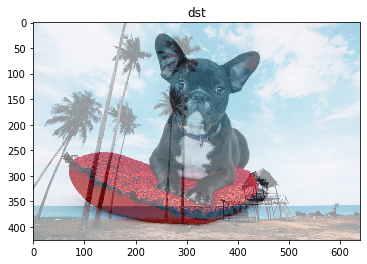

In [52]:
img1= cv2.imread('test1.jpg')
img2=cv2.imread('test2.jpg')

alpha=0.4
dst=cv2.addWeighted(img1, alpha, img2, 1-alpha, 0.0)
imshow("dst", dst)

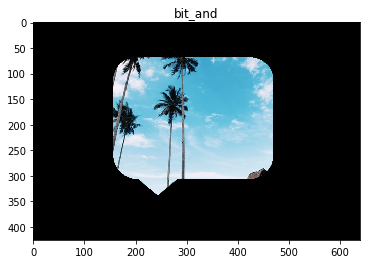

In [54]:
img1= cv2.imread('test1.jpg')
img2=cv2.imread('hole.png')

img2= cv2.resize(img2, dsize=(img1.shape[1], img1.shape[0]))

bit_and= cv2.bitwise_and(img1, img2)

imshow("bit_and", bit_and)
#[0],[1]: 행렬에서는 row column 순, 영상크기는 폭*높이 순

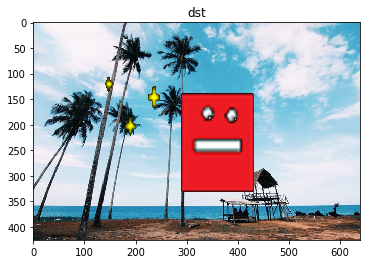

In [59]:
img1= cv2.imread('test1.jpg')
img2= cv2.imread('logo.png')
img2= cv2.resize(img2, dsize=(img1.shape[1], img1.shape[0]))

for r in range(img2.shape[0]):
    for c in range(img2.shape[1]):
        if np.mean(img2[r,c,:])>20:
            img1[r+0,c+0,:]= img2[r,c,:]
        
imshow("dst", img1)

(336, 600, 3)
(336, 600, 3)


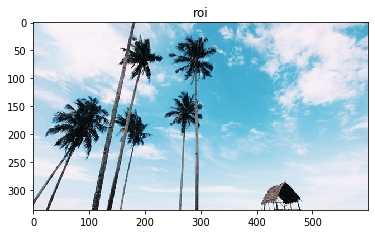

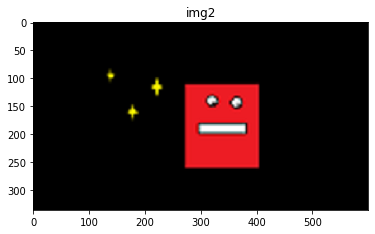

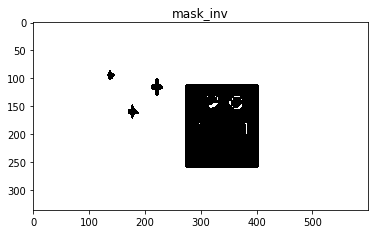

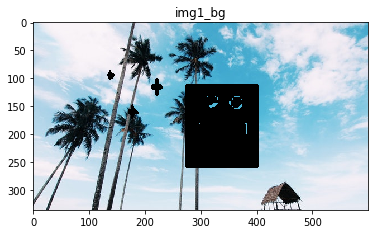

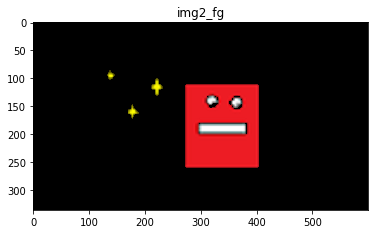

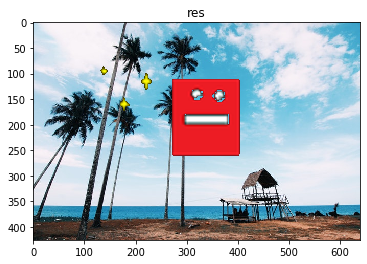

In [66]:
#전체코드
img1 = cv2.imread('test1.jpg')
img2 = cv2.imread('logo.png')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
print(roi.shape)
print(img2.shape)
imshow("roi", roi)
imshow("img2", img2)
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 50, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
imshow('mask_inv',mask_inv)


img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
imshow('img1_bg',img1_bg)


img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
imshow('img2_fg',img2_fg)


dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
imshow('res',img1)

(336, 600, 3)
(336, 600, 3)


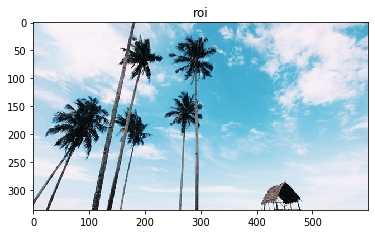

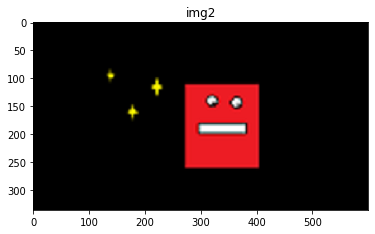

In [60]:
img1 = cv2.imread('test1.jpg')
img2 = cv2.imread('logo.png')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
print(roi.shape)
print(img2.shape)
imshow("roi", roi)
imshow("img2", img2)

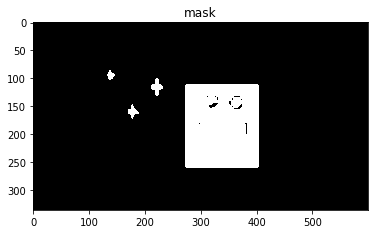

In [61]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 50, 255, cv2.THRESH_BINARY) #50보다 값이 크면 255로 threshold 
imshow('mask',mask)

#이렇게 binary 영상 만들어서 나중에 bit연산 쉽게하기 위함

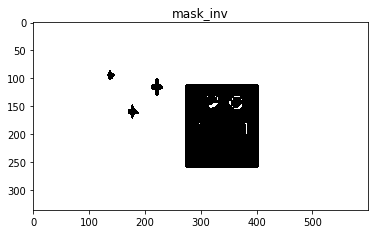

In [62]:
mask_inv = cv2.bitwise_not(mask)
imshow('mask_inv',mask_inv)
#roi는 and연산으로 투명처리되어야할부분만 뽑은것

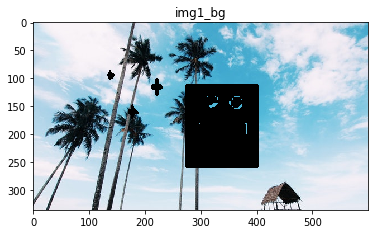

In [63]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
imshow('img1_bg',img1_bg)


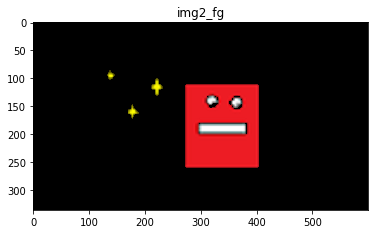

In [64]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
imshow('img2_fg',img2_fg)
#mask에 주어진 것만 연산하고, 0인것들은 연산 x : 전경부분만 뽑은거

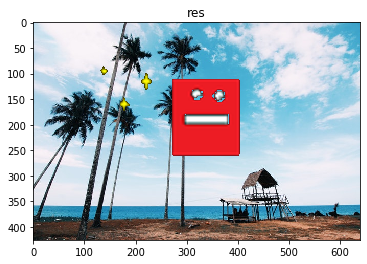

In [65]:
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
imshow('res',img1)

## 히스토그램

(array([15329., 31338., 20358., 35131., 41844., 50762., 33318., 17554.,
        15859.,   651.]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 10 Patch objects>)

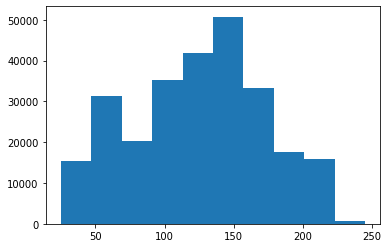

In [67]:
img= cv2.imread('lenna.bmp', 0)
plt.hist(img.flatten())
#대략적인 모형 볼수있음

(256, 1)


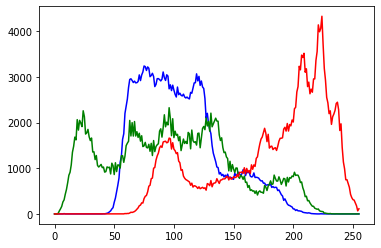

In [77]:
#hist= cv2.calcHist([img], channels(b0/g1/r2), None(마스크:0이라는건 전체영상에서 히스토그램 하겠다), histSize, histRange)

img1= cv2.imread('lenna.bmp')
hist_b=cv2.calcHist([img1],[0], None, [256], [0, 256])
hist_g=cv2.calcHist([img1],[1], None, [256],[0, 256])
hist_r=cv2.calcHist([img1],[2], None, [256], [0, 256])
print(hist_b.shape)
# print(hist_b)

plt.plot(hist_b,"b")
plt.plot(hist_g,"g")
plt.plot(hist_r,"r")

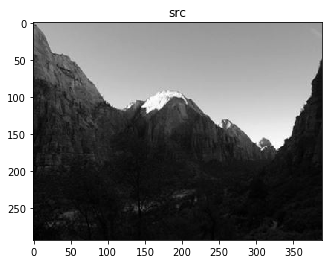

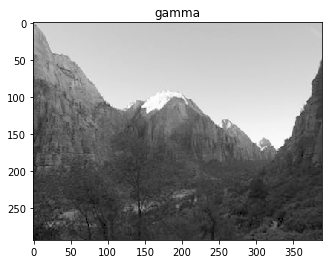

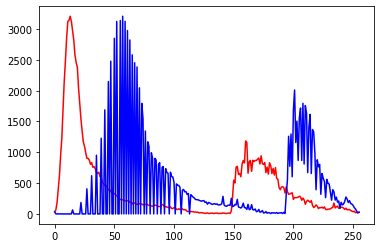

In [81]:
img1= cv2.imread("gamma3.jpg",0)
gamma= 0.5
table= np.array([((i / 255.0) **gamma)*255
                for i in np.arange(0, 256)]).astype("uint8")
out=cv2.LUT(img1, table)
imshow("src", img1)
imshow("gamma", out)

hist_1=cv2.calcHist([img1],[0], None, [256], [0, 256])
hist_2=cv2.calcHist([out],[0], None, [256], [0, 256])

plt.plot(hist_1, 'r')
plt.plot(hist_2, 'b')

In [82]:
#히스토그램 스트레칭: minmax를 늘려서 대비효과를 강하게 줌
#내 픽셀로만 하는거라point연산 != 주변사용x
src= cv2.imread('lenna.bmp',0)
gmin= float(np.min(src))
gmax= float(np.max(src))
print(gmin, gmax)

25.0 245.0


In [84]:
dst= ((src-gmin)*255. / (gmax-gmin)).astype(np.uint8)
gmin=float(np.min(dst))
gmax=float(np.max(dst))

print(gmin,gmax)

26.0 255.0


### crayfish로 테스트

In [85]:
src= cv2.imread('Crayfish.JPG',0)
gmin= float(np.min(src))
gmax= float(np.max(src))
print(gmin, gmax)

84.0 181.0


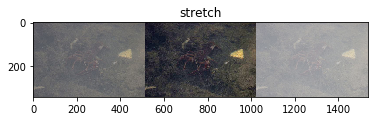

In [86]:
src = cv2.imread('crayfish.jpg')
gmin = float(np.min(src))
gmax = float(np.max(src))
dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)
dst2 = cv2.LUT(src, table)

dst = np.hstack((dst, dst2))
imshow("stretch", np.hstack((src, dst)))

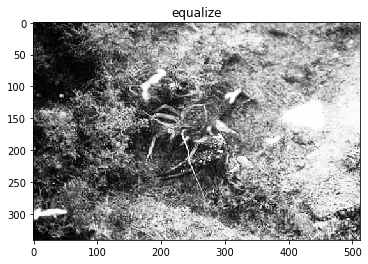

In [88]:
#히스토그램 평활화
src= cv2.imread('crayfish.jpg',0)
dst= cv2.equalizeHist(src)
imshow("equalize",dst)

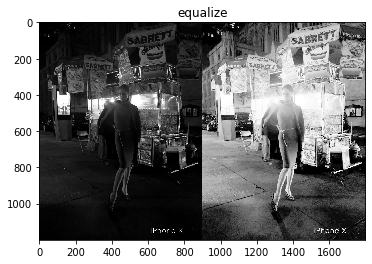

In [91]:
src= cv2.imread('g.jpg',0)
dst= cv2.equalizeHist(src)
imshow("equalize",np.hstack((src,dst)))

## 기계가 보는 관점에서의 조명 밝은곳 어두운곳 인식 용이: equalize
## 사람이 보는 관점에서 보기좋게하려면 gamma 

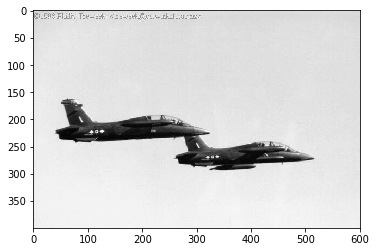

In [93]:
img= cv2.imread('0001.jpg',0)
imh= (img>127)*255
imshow("",img)

### k means 

In [ ]:
from sklearn.cluster import KMeans

# CF Kmeans: http://www.gisdeveloper.co.kr/?p=7123
# int: https://kongdols-room.tistory.com/53 